## Use the Hurst exponent to evaluate optimal pairs of a basket of assets
* assets in the basket come from sp500 etf)
* use to asses whether time series speed of diffusion from its initial value is slower than geo random walk
* speed of diffusion:
    * Var(tau) = <|z(t+tau)-z(t)|^2>
        * can be aprox <|z(t + τ) − z(t)|^2> ∼ tau^(2H)
        * H is Hurst expo
        * Geo random walk has H=0.5
        * As H decreases to 0, speed of diffusion reduces so price mean-reverting
        * As H increases to 1, price is increasingly trending
* use spread to calculate H, rank pairs by H value (low being optimal for mean reversion strat)
* as described in (A Machine Learning based Pairs Trading Investment Strategy (Simão Moraes Sarmento, Nuno Horta))

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import yfinance as yf
import itertools
import math
from co import *
import ndtest

## Calculate the Hurst exponent of a time series


In [279]:
def get_hurst_exponent(time_series, max_lag=20):
    lags = range(2, max_lag)
    
    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]

    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)

    return reg[0]

## Asset list and dates or calibration and trading

In [304]:
#Asset list
tickers = pd.read_csv('constituents_csv.csv', index_col=1)
asset_list=tickers['Symbol'].tolist()
lst=asset_list[0:50]

#dates for model calibration
start_data='2019-08-19'
end_data='2022-08-19'

#dates for trading with algo
start_trade='2022-01-01'
end_trade='2022-06-01'

index_comp='SPY'

#number of pairs traded
n=10

## Calculate Hurst exponent for the spread of every possible pair combo

In [285]:
pair_order_list = itertools.combinations(lst,2)
pairs=list(pair_order_list)
pairs[0][1]
lst=[]
for i in range(0,len(pairs)):
    asset1=pairs[i][0]
    asset2=pairs[i][1]
    
    #adjusted close and spread of asset pairs
    X = yf.download(asset1, start = start_data, end=end_data)
    X.reset_index(inplace=True)
    np.log(X['Adj Close']) - np.log(X['Adj Close'].shift(1))
    date=X['Date']
    date=date.to_frame()

    X=X['Adj Close']
    X_df=X.to_frame()
    X_df=X_df.rename(columns={'Adj Close': asset1}).dropna()

    Y = yf.download(asset2, start = start_data, end=end_data)
    Y.reset_index(inplace=True)
    np.log(Y['Adj Close']) - np.log(Y['Adj Close'].shift(1))

    Y=Y['Adj Close']
    Y_df=Y.to_frame()
    Y_df=Y_df.rename(columns={'Adj Close': asset2}).dropna()

    pairs_df=X_df.join(Y_df).join(date).set_index('Date').dropna()

    #calculate spread of adjusted close price between asset pair
    pairs_df['spread'] = pairs_df[asset1] - pairs_df[asset2]
    
    hurst_exp = get_hurst_exponent(pairs_df['spread'].values, 500)
    lst.append(tuple((pairs[i],hurst_exp)))
    
lst.sort(key=lambda a: a[1])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [287]:
res = list(zip(*lst))
pairs_lst=[]
asset1_lst=[]
asset2_lst=[]
h_expo=[]
possible_pairs=[]
for i in range(0,len(lst)): 
    asset1_lst.append(res[0][i][0])
    asset2_lst.append(res[0][i][1])
    h_expo.append(res[1][i])
    possible_pairs.append(asset1_lst[i]+'-'+asset2_lst[i])
hurst_df=pd.DataFrame(possible_pairs,h_expo)
hurst_df = pd.DataFrame(h_expo, index =possible_pairs,columns =['Hurst expo'])
hurst_df=hurst_df.style.set_caption("Hurst exponent for all possible pairs")
hurst_df



,Hurst expo
ADM-ABC,0.030749
AOS-ADI,0.052112
APD-AMZN,0.053331
ARE-GOOG,0.058664
ARE-GOOGL,0.058985
AEP-ABC,0.059946
AAPL-AMAT,0.060700
AON-ANET,0.062033
AAP-ALB,0.063197
ABT-AWK,0.063355


## Find optimal unique pairs with lowest Hurst exponent

In [288]:
selected_stocks = []
selected_pairs = []
opt_asset1=[]
opt_asset2=[]
for i in range(0,len(asset1_lst)):
    s1=asset1_lst[i]
    s2=asset2_lst[i]
  
    if (s1 not in selected_stocks) and (s2 not in selected_stocks):
        selected_stocks.append(s1)
        selected_stocks.append(s2)
        pair=s1+' and '+s2
        selected_pairs.append(pair)
    
    if len(selected_pairs) == math.comb(len(lst),2):
        break
        

print('Optimal Pairs with lowest Hurst expo:',selected_pairs)
opt_asset1=selected_stocks[0:len(selected_stocks)-1:2]
opt_asset2=selected_stocks[1:len(selected_stocks):2]

    

Optimal Pairs with lowest Hurst expo: ['ADM and ABC', 'AOS and ADI', 'APD and AMZN', 'ARE and GOOG', 'AAPL and AMAT', 'AON and ANET', 'AAP and ALB', 'ABT and AWK', 'MO and AEE', 'MMM and A', 'AAL and AJG', 'ABMD and ANSS', 'ABBV and AEP', 'AKAM and ALLE', 'AMCR and AMT', 'LNT and ALL', 'AMD and APTV', 'GOOGL and AME', 'ACN and AMP', 'AES and AMGN', 'AXP and AIG', 'AFL and ALK', 'ANTM and APA', 'ADBE and ALGN', 'ATVI and APH']


## Fit copulas to each optimal pair using AIC and BIC and test if good fit with K-S test

In [290]:
df=pd.DataFrame()
best_cop_lst=[]
for i in range(0,len(opt_asset1)):
    #assets (yfinance ticker)
    asset1=opt_asset1[i]
    asset2=opt_asset2[i]
    pairs=selected_pairs[i] #insert name of asset 1 and asset 2

    #fetch log returns of pair (to model calibration)

    X = yf.download(asset1, start = start_data, end=end_data)
    X.reset_index(inplace=True)
    X.tail()
    X['Log_Returns'] = np.log(X['Adj Close']) - np.log(X['Adj Close'].shift(1))
    x = X['Log_Returns'].drop(labels=0, axis=0).dropna()
    date=X['Date'].drop(labels=0,axis=0)
    date=date.to_frame()




    Y = yf.download(asset2, start = start_data, end=end_data)
    Y.reset_index(inplace=True)
    Y.tail()
    Y['Log_Returns'] = np.log(Y['Adj Close']) - np.log(Y['Adj Close'].shift(1))
    y = Y['Log_Returns'].drop(labels=0, axis=0).dropna()

    #fit distribution to element in pair + probability integral transform to get marginal uniform

    param1 = stats.t.fit(x)
    dist1=stats.t(*param1)
    u=dist1.cdf(x)
    param2=stats.t.fit(y)
    dist2=stats.t(*param2)
    v=dist2.cdf(y)



    #put returns in a data frame with corresponding dates
    x_df=x.to_frame()
    y_df=y.to_frame()

    a=y_df.rename(columns={'Log_Returns': asset2})
    b=x_df.rename(columns={'Log_Returns': asset1})

    p =a.join(b)
    x=p.join(date)

    returns_df=x.set_index('Date')


    #fit bivariate copula family to data 
    #calculate Akaike information criterion, Bayesion information criterion and KS value to help determine good fit

    pair=[pairs]
    copulas_df = pd.DataFrame(index=pair, columns=['copula', 'parameter', 'aic', 'bic', 'KS_pvalue'])


    best_aic = np.inf
    best_copula= None


    copulas=[GaussianCopula(),GumbelCopula(), ClaytonCopula(),FrankCopula()]
    for copula in copulas:
        copula.fit(u,v)

        L = copula.log_likelihood(u,v)
        aic = 2 * copula.num_params - 2 * L
        if aic < best_aic:
            best_aic = aic
            best_bic = copula.num_params * np.log(len(u)) - 2 * L
            best_copula = copula

            # calculate KS-pvalue
            smp = copula.sample(size=len(u)) # generate sample from fit copula
            s_u = smp[:,0]
            s_v = smp[:,1]
            ks_pval = ndtest.ks2d2s(u,v,s_u,s_v)

            if isinstance(copula, ArchimedeanCopula):
                best_param = copula.alpha
            else:
                best_param = copula.rho
    
    best_cop_lst.append(best_copula)
    copulas_df.loc[pair] = [best_copula.name, best_param, best_aic, best_bic, ks_pval]
    df=df.append(copulas_df)




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/Users/SophiaZorek/Desktop/coding projects/Pairs Trading/co.py:28: RuntimeWarning: invalid value encountered in log
  return np.log(self.pdf(u,v)).sum()
/Users/SophiaZorek/Desktop/coding projects/Pairs Trading/co.py:322: RuntimeWarning: invalid value encountered in power
  num = (u**(-alpha) * v**(-alpha) * (alpha+1) * (-1 + v**(-alpha) + u**(-alpha))**(-1/alpha))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [291]:
df

,copula,parameter,aic,bic,KS_pvalue
ADM and ABC,Gaussian,0.425854,-451.892103,-447.264061,0.600341
AOS and ADI,Gaussian,0.505152,-502.224203,-497.596162,0.559191
APD and AMZN,Gaussian,0.379266,-420.098312,-415.47027,0.485726
ARE and GOOG,Gaussian,0.447333,-465.736893,-461.108852,0.045903
AAPL and AMAT,Gaussian,0.60703,-573.252956,-568.624914,0.300347
AON and ANET,Gaussian,0.407014,-439.378053,-434.750011,0.345021
AAP and ALB,Gaussian,0.354018,-401.756018,-397.127976,0.768291
ABT and AWK,Gaussian,0.512812,-507.073526,-502.445485,0.283795
MO and AEE,Gaussian,0.343429,-393.540264,-388.912222,0.590661
MMM and A,Gaussian,0.428651,-453.723266,-449.095224,0.139086


## Algo returns for specific trading period
*refer to (Pairs Trading with Copulas.ipynb) for further explanation of algo/
* select n pairs from optimal pairs with the lowest Hurst expo
##### specific trades can be seen by printing out the positions DataFrame

In [298]:
#dataframe of the returns for the specific trading period for each pair
algo_returns = {}
cl = 0.99

for q in range(0,n):
    X_trade = yf.download(opt_asset1[q], start =start_trade, end=end_trade)
    X_trade.reset_index(inplace=True)
    X_trade['Log_Returns'] = np.log(X_trade['Adj Close']) - np.log(X_trade['Adj Close'].shift(1))
    x_trade = X_trade['Log_Returns'].drop(labels=0, axis=0).dropna()
    date=X_trade['Date'].drop(labels=0,axis=0)
    date=date.to_frame()
    

    Y_trade = yf.download(opt_asset2[q], start = start_trade, end=end_trade)
    Y_trade.reset_index(inplace=True)
    Y_trade.tail()
    Y_trade['Log_Returns'] = np.log(Y_trade['Adj Close']) - np.log(Y_trade['Adj Close'].shift(1))
    y_trade = Y_trade['Log_Returns'].drop(labels=0, axis=0).dropna()

    #put returns in a data frame with corresponding dates
    x2_df=x_trade.to_frame()
    y2_df=y_trade.to_frame()
    
    
    a=x2_df.rename(columns={'Log_Returns': opt_asset1[q]})
    m=y2_df.rename(columns={'Log_Returns': opt_asset2[q]})
    

    p =m.join(a)
    x=p.join(date)

    returns_trade_period=x.set_index('Date')
    
    # calculate conditional probabilities
    prob1=[]
    prob2=[]

    for u,v in zip(dist1.cdf(returns_trade_period[opt_asset1[q]]), dist2.cdf(returns_trade_period[opt_asset2[q]])):
        prob1.append(best_cop_lst[q].cdf_u_given_v(u,v))
        prob2.append(best_cop_lst[q].cdf_v_given_u(u,v))


    probs_trade= pd.DataFrame(np.vstack([prob1,prob2]).T,index=returns_trade_period.index, columns=[opt_asset1[q],opt_asset2[q]])



    #calculate positions
    positions=pd.DataFrame(index=probs_trade.index, columns = probs_trade.columns)
    long = False
    short = False


    for t in positions.index:    
        # if long position is open
        if long:
            if (probs_trade.loc[t][opt_asset1[q]] > 0.5) or (probs_trade.loc[t][opt_asset2[q]] < 0.5):
                positions.loc[t] = [0,0]
                long = False
            else:
                positions.loc[t] = [1,-1]

        # if short position is open
        elif short:
            if (probs_trade.loc[t][opt_asset1[q]] < 0.5) or (probs_trade.loc[t][opt_asset2[q]] > 0.5):
                positions.loc[t] = [0,0]
                short = False
            else:
                positions.loc[t] = [-1,1]

        # if no positions are open
        else:
            if (probs_trade.loc[t][opt_asset1[q]] < (1-cl)) and (probs_trade.loc[t][opt_asset2[q]] > cl):
                # open long position
                positions.loc[t] = [1,-1]
                long = True
            elif (probs_trade.loc[t][opt_asset1[q]] > cl) and (probs_trade.loc[t][opt_asset1[q]] < (1-cl)):
                # open short positions
                positions.loc[t] = [-1,1]
                short = True
            else:
                positions.loc[t] = [0,0]


    # calculate returns
    algo_ret = (returns_trade_period * positions.shift()).sum(axis=1)
    algo_returns[selected_pairs[q]] = algo_ret

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [299]:
rets = pd.DataFrame.from_dict(algo_returns)
rets = np.exp(rets) - 1 # convert log-returns to simple returns
total_ret = rets.sum(axis=1) / len(rets.columns) * 2 # double capital (from short positions)

In [300]:
index_price = yf.download(index_comp, start=start_trade, end=end_trade)
index_price = index_price['Adj Close']
index_ret = index_price.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


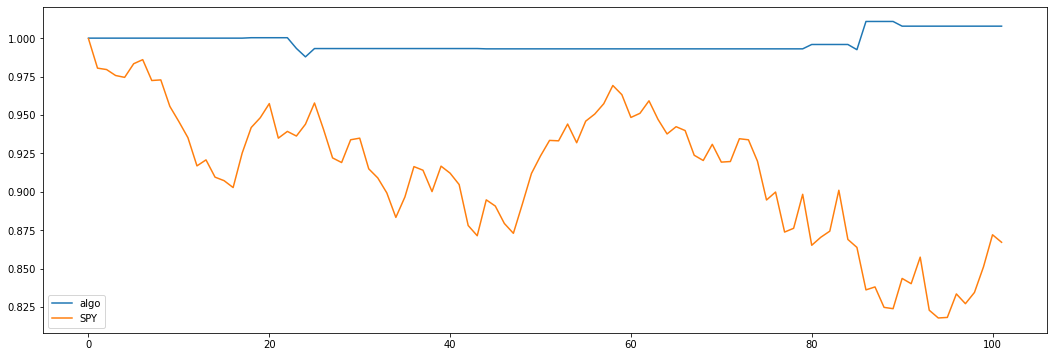

In [301]:
plt.figure(figsize=(18,6))
plt.plot(np.nancumprod(total_ret + 1), label='algo')
plt.plot(np.nancumprod(index_ret + 1), label=index_comp)
plt.legend()

In [302]:
def metrics_calc(cumret):
    total_return = (cumret[-1] - cumret[0])/cumret[0]
    apr = (1+total_return)**(252/len(cumret)) - 1
    rets = pd.DataFrame(cumret).pct_change()
    sharpe = np.sqrt(252) * np.nanmean(rets) / np.nanstd(rets)
    
    # maxdd and maxddd
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=cumret[t]/highwatermark[t]-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD=np.min(drawdown)
    maxDDD=np.max(drawdownduration)
    
    return total_return, apr, sharpe, maxDD, maxDDD

In [303]:
metrics = pd.DataFrame(index=['Algo', index_comp], columns=['Total return', 'APR', 'Sharpe', 'Max Drawdown', 'Max Drawdown Duration'])
metrics.loc['Algo'] = metrics_calc(np.nancumprod(total_ret + 1))
metrics.loc[index_comp] = metrics_calc(np.nancumprod(index_ret + 1))
metrics

,Total return,APR,Sharpe,Max Drawdown,Max Drawdown Duration
Algo,0.007799,0.019378,0.577382,-0.012455,63.0
SPY,-0.132629,-0.296394,-1.330918,-0.170587,95.0
